In [29]:
## **ZOMATO EDA**
## Zomato: Zomato is an Indian food aggregator and a food delivery comapny operating presently in 24 countries. 
## Zomato on a usual day cloacks 13 lakhs to 15 lakhs of ordr every day.
The following EDA focuses on:


1.   The impact on ratings if the restaurant provides the convinience to customers of online food deivery. Frequency tables are used here.
2.   Understanding human language pattern.
3. Cuisine preferencees at various locations.

Following are the steps to be followed:
1. Use Pandas to perform data cleaning and manipulation.
2. Use Pandas, matplotlib, seaborn to create effective visualizations.
3. Use NLTK platform to analyse and visualize human language data patterns.
4. Perform Unigram, Bigram,Trigram analysis on patterns.
5. Use libraries such as Geocoder and Geopy to Create heatmaps to showcase hotspots of various cuisines preferred by customers.
6. Summerize the inference and conclude.

In [1]:
# Access all necessary libraries.

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Accesss the source file

connection = sqlite3.connect(r"C:\Users\suraj\Downloads\Resources/zomato_rawdata.sqlite")

In [4]:
df = pd.read_sql_query("SELECT * FROM Users" , connection)

In [5]:
# understand basic structure of the souce file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [6]:
df.head((3))

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [8]:
# Finding total percentage of null values
df.isnull().sum()/len(df)*100


# null values will not be dropped here as we can lose relevant data. It will be dealth when the need arises.

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
# Any rating that cannot be converted into float type will be replaced with "nan".It can also be replaced by zero here.

df['rate'].replace(('NEW' , '-',"None") , np.nan , inplace=True)

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
float("4.1/5".split("/")[0]) 

4.1

In [13]:
# To find the corelation we would be converting the format of "4.1/5" to "4.1"

df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [14]:
# We are going to use a crosstab function to reate a pivo tabble which further can be used in graphs.
corelation = pd.crosstab(df["rate"],df["online_order"])

In [15]:
corelation

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:title={'center':'Rating vs volume'}, xlabel='rate'>

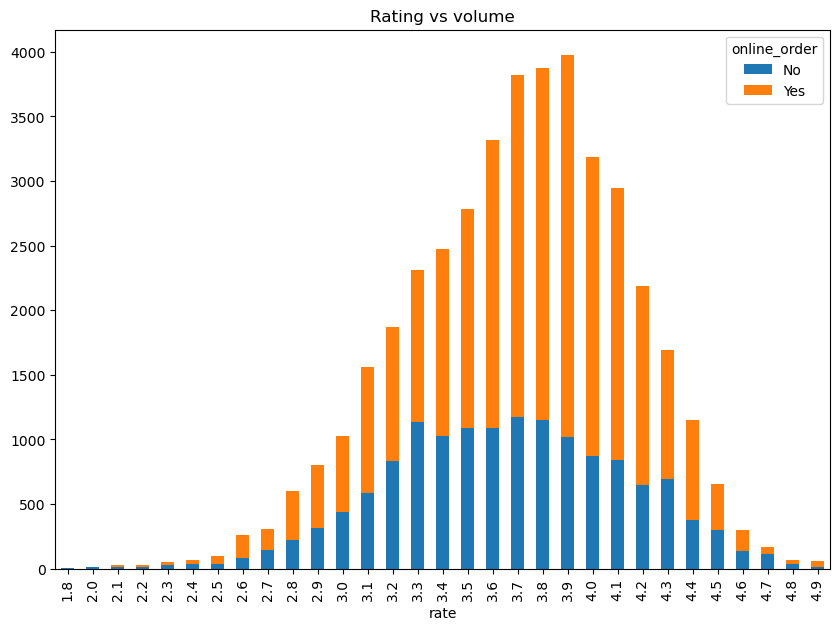

In [40]:
corelation.plot(kind = "bar", stacked = True, figsize = (10,7),title = "Rating vs volume")


# as we can see from the graph, if the restaurant provides online order facility, number of orders it receives increases.

In [65]:
corelation.sum(axis = 1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [27]:
# For a stacked bar chart in terms of percentage 
norm_corelation = corelation.div(corelation.sum(axis = 1),axis =0)*100

<AxesSubplot:title={'center':'Order volume characteristics in percentage for restaurants'}, xlabel='rate'>

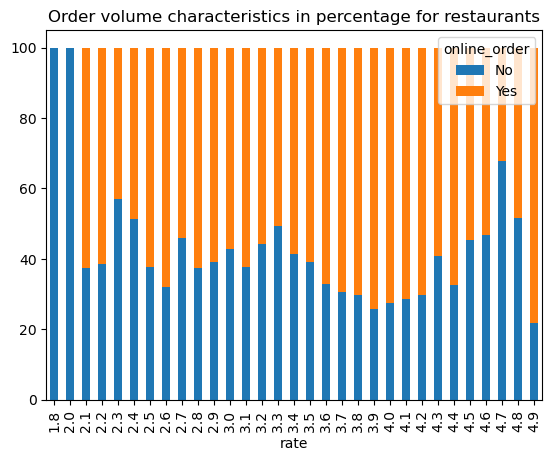

In [29]:
norm_corelation.plot(kind="bar",stacked = True,title = "Order volume characteristics in percentage for restaurants")

In [104]:
null_data = df["rest_type"].isna().sum()
all_data = df["rest_type"].count()
null_percent = (null_data / all_data )*100
null_percent
#Since percent of null data is very less, I would rather drop the null values.

0.4408623033598757

In [42]:
data = df.dropna(subset="rest_type")
data

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [43]:
# knowing all types of rest types
data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [45]:
#Extracting all oder info where rest type is quick bites
quick_bites_data = data[data['rest_type'].str.contains('Quick Bites')]

In [46]:
quick_bites_data

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [47]:
quick_bites_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20639 entries, 3 to 51645
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        20639 non-null  int64  
 1   url                          20639 non-null  object 
 2   address                      20639 non-null  object 
 3   name                         20639 non-null  object 
 4   online_order                 20639 non-null  object 
 5   book_table                   20639 non-null  object 
 6   rate                         15207 non-null  float64
 7   votes                        20639 non-null  int64  
 8   phone                        20116 non-null  object 
 9   location                     20639 non-null  object 
 10  rest_type                    20639 non-null  object 
 11  dish_liked                   5962 non-null   object 
 12  cuisines                     20634 non-null  object 
 13  approx_cost(for 

In [48]:
# Data pre-proceesiing
quick_bites_data["reviews_list"]

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [49]:
# converting allletters to lowercase to eliminate case sensitivity
quick_bites_data['reviews_list'] = quick_bites_data['reviews_list'].apply(lambda x:x.lower())

C:\Users\suraj\AppData\Local\Temp\ipykernel_10340\3803242675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_data['reviews_list'] = quick_bites_data['reviews_list'].apply(lambda x:x.lower())


In [53]:
#Using NLTK (Natural language toolkit) library to analysze words used.

from nltk.corpus import RegexpTokenizer

In [55]:
# RegExp tokenizer is used here to not consider special characters
token = RegexpTokenizer("[a-zA-Z]+")

In [56]:
token.tokenize(quick_bites_data["reviews_list"][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [58]:
# Due to system limitations I will be using a sample data
sample_data = data[0:20000]


In [60]:
token_all = sample_data["reviews_list"].apply(token.tokenize)
token_all

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
20080    [Rated, RATED, n, Food, was, good, brought, ve...
20081    [Rated, RATED, n, Wanted, some, good, cupcakes...
20082    [Rated, RATED, n, The, best, chai, place, I, w...
20083    [Rated, RATED, n, Visited, this, place, a, few...
20084    [Rated, RATED, n, Have, ordered, food, twice, ...
Name: reviews_list, Length: 20000, dtype: object

In [73]:
from nltk.corpus import stopwords


In [74]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [75]:
#stopwords will be removed from the data and few other stopwords in this dataset too will be dded.
stop.extend(["rated","RATED","n","nan","NaN","Rated","x"])

In [76]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
#5th review will be used here
review5 = token_all[5]

In [80]:
print([token for token in review5 if token not in stop])

['Food', 'nAmbience', 'nService', 'nHad', 'family', 'lunch', 'This', 'place', 'serves', 'buffets', 'We', 'ordered', 'soups', 'babycorn', 'starters', 'butter', 'naan', 'kadai', 'panner', 'veg', 'kohlapuri', 'pease', 'pulav', 'Food', 'good', 'But', 'service', 'slow', 'They', 'make', 'wait', 'mins', 'get', 'order', 'This', 'place', 'apt', 'family', 'hangout', 'nCheers']


In [81]:
#Remove stopwords from token_all
token_dis = token_all.apply(lambda x : [token for token in x if token not in stop])

In [82]:
token_all_list = list(token_dis)

In [83]:
token_1d = []
for i in token_all_list:
    for word in i:
        token_1d.append(word)

In [84]:
token_1d

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [85]:
#To obtain frequency of all words FreqDist is imported from nltk
from nltk import FreqDist

In [87]:
freqdist = FreqDist()
type(freqdist)

nltk.probability.FreqDist

In [88]:
#create a 2D list to include count of words
for word in token_1d:
    freqdist[word] = freqdist[word] +1

In [89]:
freqdist

FreqDist({'place': 321839, 'I': 309236, 'good': 296998, 'food': 274465, 'The': 227468, 'chicken': 105894, 'service': 93451, 'ordered': 88742, 'taste': 84172, 'great': 81191, ...})

In [90]:
# Gathering 25 most used words
freqdist.most_common(25)

[('place', 321839),
 ('I', 309236),
 ('good', 296998),
 ('food', 274465),
 ('The', 227468),
 ('chicken', 105894),
 ('service', 93451),
 ('ordered', 88742),
 ('taste', 84172),
 ('great', 81191),
 ('really', 80048),
 ('try', 74505),
 ('time', 73610),
 ('ambience', 73340),
 ('one', 72952),
 ('It', 70871),
 ('also', 67874),
 ('like', 67427),
 ('We', 62004),
 ('visit', 61761),
 ('nice', 60484),
 ('nThe', 58400),
 ('best', 55896),
 ('well', 54520),
 ('restaurant', 52881)]

In [91]:
type(freqdist)

nltk.probability.FreqDist

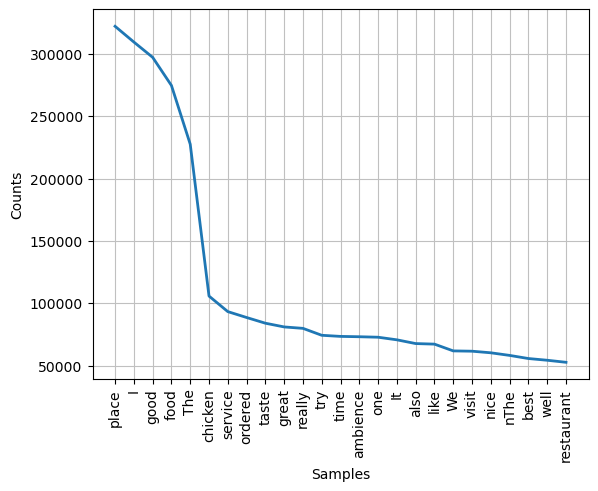

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [92]:
# creating a simple plot diagram to showcase application of singular words.
freqdist.plot(25)

In [247]:
#Following the same procedure used for unigram analysis to analyze 2/3 words used together. 
from nltk import bigrams, trigrams

In [248]:
bigrams_ = bigrams(token_1d)

In [249]:
fd_bigrams = FreqDist()
for bigram in bigrams_:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [262]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

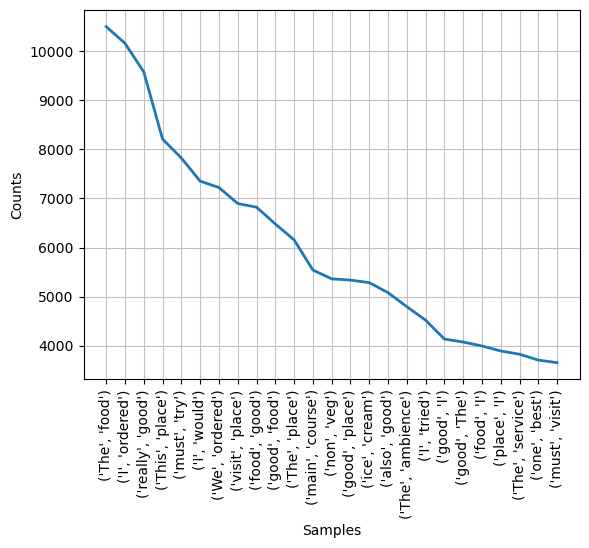

In [261]:
fd_plot =  fd_bigrams.plot(25)

In [267]:
trigram_ = trigrams(token_1d)

In [269]:
fd_trigrams = FreqDist()
for trigram in trigram_:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [270]:
fd_trigrams.most_common(100)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

In [271]:
# Using Geocode and Geopy to map hotspots for a particular cuisine
!pip install geocoder
!pip install geopy

     -------------------------------------- 98.6/98.6 kB 435.2 kB/s eta 0:00:00
     ------------------------------------ 119.8/119.8 kB 438.3 kB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 320.0 kB/s eta 0:00:00


In [107]:
unique_loc = df["location"].unique()

In [108]:
df["location"] = df["location"] + ",Bangaluru"

In [109]:
df["location"]

0                      Banashankari,Bangaluru,Bangaluru
1                      Banashankari,Bangaluru,Bangaluru
2                      Banashankari,Bangaluru,Bangaluru
3                      Banashankari,Bangaluru,Bangaluru
4                      Basavanagudi,Bangaluru,Bangaluru
                              ...                      
51712                    Whitefield,Bangaluru,Bangaluru
51713                    Whitefield,Bangaluru,Bangaluru
51714                    Whitefield,Bangaluru,Bangaluru
51715    ITPL Main Road, Whitefield,Bangaluru,Bangaluru
51716    ITPL Main Road, Whitefield,Bangaluru,Bangaluru
Name: location, Length: 51717, dtype: object

In [106]:
# null locations are to be removed here
df["location"].isnull().sum()

21

In [110]:
len(df["location"])

51717

In [111]:
df_copy = df.dropna(subset = ["location"])

In [112]:
len(df_copy["location"])

51696

In [113]:
df_copy["location"].isnull().sum()

0

In [114]:
# a DF consisting of unique spots is to be used to showcase hotspots
locations = pd.DataFrame(df_copy["location"].unique())

In [115]:
locations.columns = ["Name"]

In [116]:
locations

,Name
0,"Banashankari,Bangaluru,Bangaluru"
1,"Basavanagudi,Bangaluru,Bangaluru"
2,"Mysore Road,Bangaluru,Bangaluru"
3,"Jayanagar,Bangaluru,Bangaluru"
4,"Kumaraswamy Layout,Bangaluru,Bangaluru"
...,...
88,"West Bangalore,Bangaluru,Bangaluru"
89,"Magadi Road,Bangaluru,Bangaluru"
90,"Yelahanka,Bangaluru,Bangaluru"
91,"Sahakara Nagar,Bangaluru,Bangaluru"


In [117]:
from geopy.geocoders import Nominatim

In [118]:
locator = Nominatim(user_agent="app",timeout = None)

In [119]:
locator

In [120]:
#extracting the latitudes and longitudes of various unique places through nominatim
lat = []
lon = []


for i in locations["Name"]:
    location = locator.geocode(i)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [121]:
locations["latitude"]=lat

In [122]:
locations["longitude"] = lon

In [123]:
locations

,Name,latitude,longitude
0,"Banashankari,Bangaluru,Bangaluru",12.915221,77.573598
1,"Basavanagudi,Bangaluru,Bangaluru",12.941726,77.575502
2,"Mysore Road,Bangaluru,Bangaluru",12.946662,77.530090
3,"Jayanagar,Bangaluru,Bangaluru",12.929273,77.582423
4,"Kumaraswamy Layout,Bangaluru,Bangaluru",12.908149,77.555318
...,...,...,...
88,"West Bangalore,Bangaluru,Bangaluru",13.022235,77.567183
89,"Magadi Road,Bangaluru,Bangaluru",12.975608,77.555356
90,"Yelahanka,Bangaluru,Bangaluru",13.100698,77.596345
91,"Sahakara Nagar,Bangaluru,Bangaluru",13.062147,77.580061


In [124]:
locations[locations["latitude"].isnull()]

,Name,latitude,longitude
45,"St. Marks Road,Bangaluru,Bangaluru",NaN,NaN
79,"Rammurthy Nagar,Bangaluru,Bangaluru",NaN,NaN
85,"Sadashiv Nagar,Bangaluru,Bangaluru",NaN,NaN


In [133]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")


In [134]:
# allocating latitudes and longitudes manually to the places with null data.
locations["latitude"][45]= 12.9765209
locations["longitude"][45]= 77.6017736

locations["latitude"][79] = 13.0163
locations["longitude"][79] = 77.6785

locations["latitude"][85] = 13.0068
locations["longitude"][85] = 77.5813

In [135]:
locations[locations["latitude"].isna()]

,Name,latitude,longitude


In [136]:
len(df[df["cuisines"].isna()])

0

In [137]:
df = df.dropna(subset = ["cuisines"])

In [138]:
len(df[df["cuisines"].isna()])

0

In [139]:
#creating map to identify hotspots for restaurants offering "north indian" food.
north_indian_food = df[df["cuisines"].str.contains("North Indian")]

In [140]:
north_indian_food.shape

(21085, 18)

In [141]:
north_india_count = north_indian_food["location"].value_counts().reset_index().rename(columns = {"index" : "Name","location":"count"})

In [142]:
north_indian_resto = north_india_count.merge(locations,how = "left", on = "Name")

In [143]:
north_indian_resto

,Name,count,latitude,longitude
0,"BTM,Bangaluru,Bangaluru",2469,12.911276,77.604565
1,"HSR,Bangaluru,Bangaluru",1123,12.911623,77.638862
2,"Whitefield,Bangaluru,Bangaluru",1059,12.969637,77.749745
3,"Marathahalli,Bangaluru,Bangaluru",1038,12.955257,77.698416
4,"JP Nagar,Bangaluru,Bangaluru",958,12.880358,77.579658
...,...,...,...,...
85,"Hebbal,Bangaluru,Bangaluru",4,13.038218,77.591900
86,"Jakkur,Bangaluru,Bangaluru",3,13.078474,77.606894
87,"Central Bangalore,Bangaluru,Bangaluru",2,13.010129,77.554801
88,"West Bangalore,Bangaluru,Bangaluru",1,13.022235,77.567183


In [144]:
# since folium coul not be imported i am using a conda install method
conda install -c conda-forge folium

SyntaxError: invalid syntax (2026716265.py, line 2)

In [145]:

from folium import plugins
from folium.plugins import HeatMap

In [146]:
HeatMap(north_indian_resto[["latitude","longitude","count"]])

In [147]:
import folium

In [148]:
basemap =folium.Map()
HeatMap(north_indian_resto[["latitude","longitude","count"]]).add_to(basemap)

In [149]:
basemap

In [151]:
#Automating the data analysis function with a simple function with an input.
def cuisine_heatmap(cuisine):
    kind_food = df[df["cuisines"].str.contains(cuisine)]
    north_india_count1 =  kind_food["location"].value_counts().reset_index().rename(columns = {"index" : "Name","location":"count"})
    north_indian_resto = north_india_count1.merge(locations,how = "left", on = "Name")
    print(north_indian_resto.head(2))
    
    basemap =folium.Map()
    HeatMap(north_indian_resto[["latitude","longitude","count"]]).add_to(basemap)
    return basemap
    

In [152]:
cuisine_heatmap("Thai")

                                        Name  count   latitude  longitude
0  Koramangala 5th Block,Bangaluru,Bangaluru    125  12.934843  77.618977
1                MG Road,Bangaluru,Bangaluru     71  12.975526  77.606790


In [153]:
cuisine_heatmap("South Indian")

                           Name  count   latitude  longitude
0       BTM,Bangaluru,Bangaluru    815  12.911276  77.604565
1  JP Nagar,Bangaluru,Bangaluru    437  12.880358  77.579658


In [ ]:
#conclusions:
1. It is clear that restaurants tend to concentrate in central bangalore area.
2. The clutter of restaurants lowers are we move away from central.
3. So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
4. heatmap is good when we have latitude,longitude or importance of that particular place or count of that place